In [1]:
import os
import pandas as pd

In [2]:
# === 1. Ayar
klasor = "./etiketli_yorum_dosyaları"  # veya "./etiketli_dosyalar/" gibi
birlesik_df = pd.DataFrame()

In [3]:
# === 2. Bütün etiketli CSV dosyalarını oku
for dosya in os.listdir(klasor):
    if dosya.startswith("etiketli_") and dosya.endswith(".csv"):
        try:
            df = pd.read_csv(os.path.join(klasor, dosya), comment="#")
            df = df[["review_text", "predicted_label", "confidence"]]  # sadece gerekli sütunlar
            df["dosya_adi"] = dosya  # hangi dosyadan geldiğini not al
            birlesik_df = pd.concat([birlesik_df, df], ignore_index=True)
        except Exception as e:
            print(f"❌ Dosya okunamadı: {dosya} — {e}")

print(f"\n✅ Toplam yorum sayısı: {len(birlesik_df)}")


✅ Toplam yorum sayısı: 387433


In [4]:
# === 3. Genel güven ortalaması
ortalama_guven = birlesik_df["confidence"].mean()
print(f"🎯 Ortalama model güveni: {ortalama_guven:.2f}")

🎯 Ortalama model güveni: 0.55


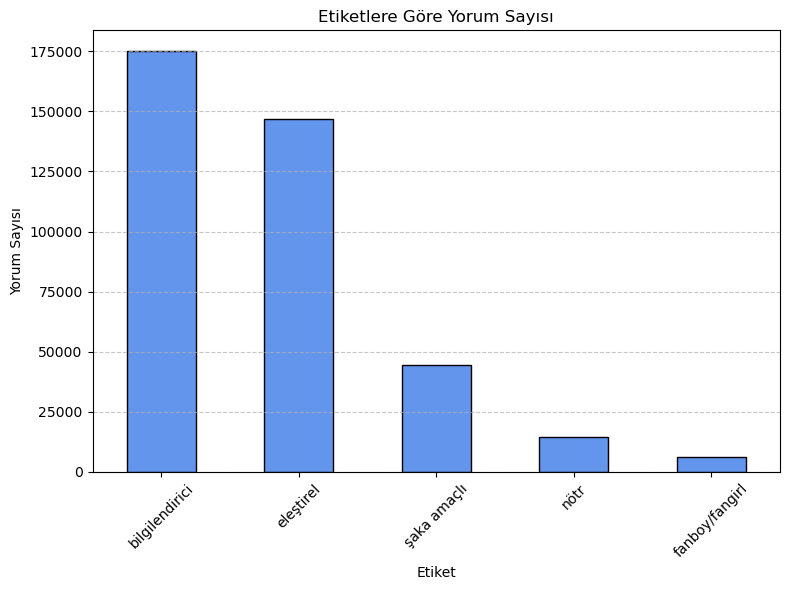

In [10]:
import matplotlib.pyplot as plt

# === Etiket sayımını hesapla
label_sayim = birlesik_df["predicted_label"].value_counts()

# === Bar grafiği çiz
plt.figure(figsize=(8, 6))
label_sayim.plot(kind="bar", color="cornflowerblue", edgecolor="black")

plt.title("Etiketlere Göre Yorum Sayısı")
plt.xlabel("Etiket")
plt.ylabel("Yorum Sayısı")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

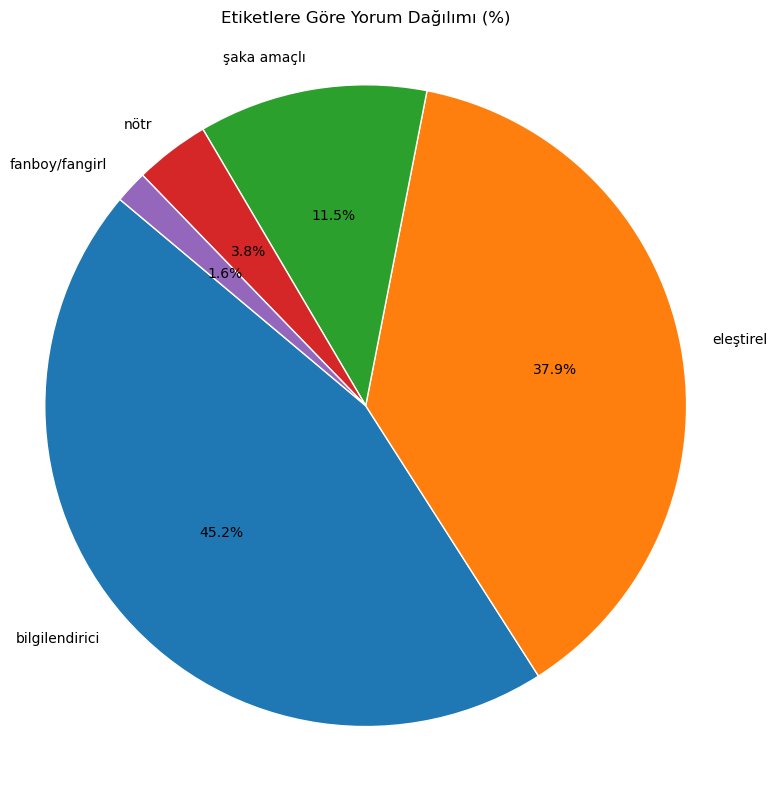

In [11]:
import matplotlib.pyplot as plt

# === Etiket oranlarını hesapla
label_oranlari = birlesik_df["predicted_label"].value_counts(normalize=True) * 100

# === Pasta grafiği oluştur
plt.figure(figsize=(8, 8))
plt.pie(
    label_oranlari,
    labels=label_oranlari.index,
    autopct="%1.1f%%",
    startangle=140,
    wedgeprops={"edgecolor": "white"}
)
plt.title("Etiketlere Göre Yorum Dağılımı (%)")
plt.axis("equal")
plt.tight_layout()
plt.show()